##Predicción de precios con Random Forest
En este caso con Random forest ya no utilizaremos solo 1 arbol de decision, sino que varios arboles, de los cuales se promediara la prediccion de cada uno de estos. En general este modelo genera mejores predicciones.

In [64]:
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
# Fuente: https://www.kaggle.com/dansbecker/melbourne-housing-snapshot
melbourne_file_path = '/content/drive/MyDrive/Data Kaggle/melb_data.csv'
# read la data
melbourne_data = pd.read_csv(melbourne_file_path) 
# imprimimos un resumen
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


##Seleccionamos la variable dependiente y las variables independientes que nos permitiran hacer la predicción

In [80]:
melbourne_data = melbourne_data.dropna(axis=0)   #eliminams filas con valornes nulos

y = melbourne_data['Price']

X = melbourne_data[['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude']]

##Construimos el modelo

In [81]:
from sklearn.model_selection import train_test_split

In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [83]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)   # Dividimos la data en entrenamiento y validacion #random state asegura siempre tener la misma division de la data

In [84]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

191669.7536453626


In [89]:
r2_score(y,predict_y)

0.9003697116730242

In [86]:
predict_y = forest_model.predict(X)
SST = np.sum((y - np.mean(y))**2)
SSE = np.sum((y - predict_y)**2)

R2 = 1 - (SSE/SST) 
print(R2)             #otro metodo para obtener R2

0.9003697116730242


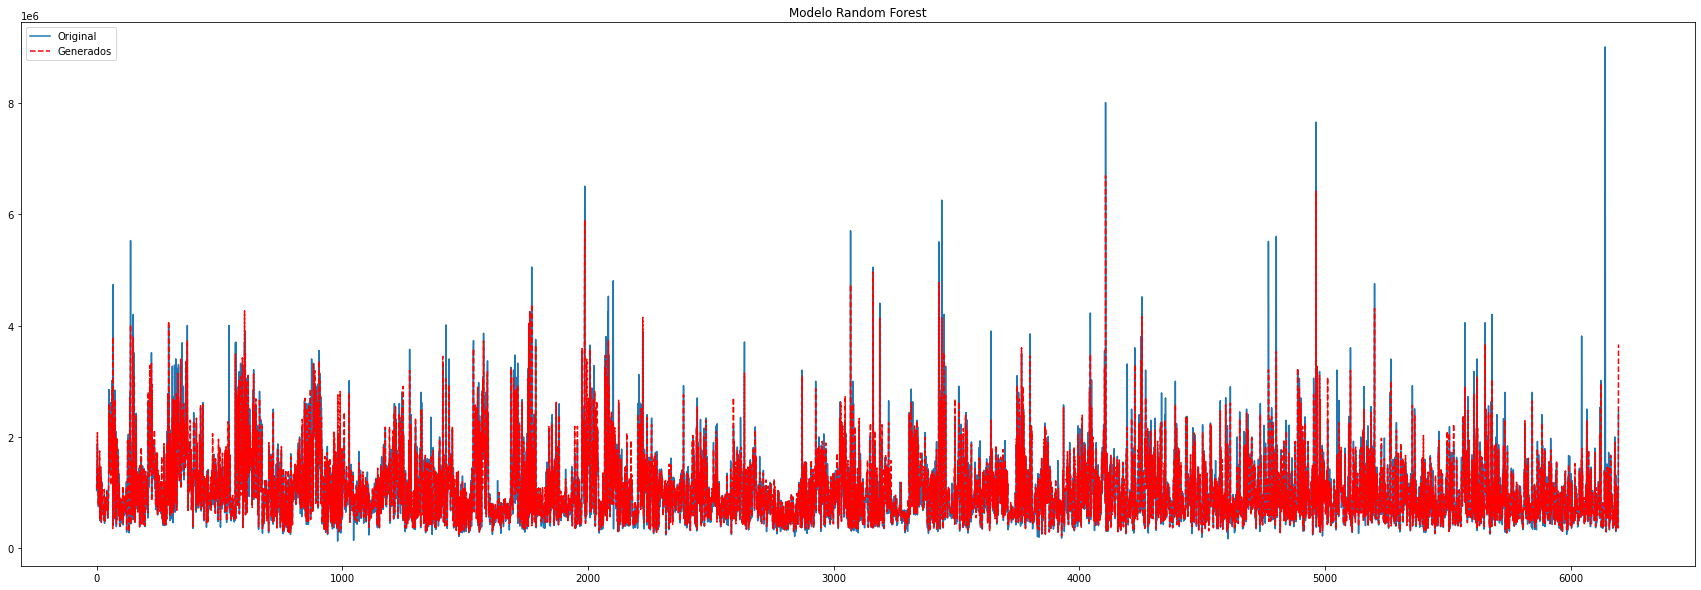

In [75]:
plt.figure(figsize=(30,10))
plt.plot(np.arange(len(y)),y,label="Original")
plt.plot(np.arange(len(y)),predict_y,'--',color="red", label="Generados")

plt.legend()
plt.title('Modelo Random Forest')
plt.show()

##Conclusiones
Con Random Forest ogramos mejorar el MAE. Por otro lado, logramos obtener un R2 de 90%, convirtiendolo en un modelo de predicción de precios fiable.